In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
# For time stamps
from datetime import datetime
#for normalizing the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler



In [49]:

ticker_symbol = '^NSEI'  
ticker= ticker_symbol
# end = datetime.now()
# start = datetime(end.year - 7, end.month, end.day)

start = datetime(2018, 10, 1)
end = datetime(2019, 4, 25)

stock_data = yf.download(ticker_symbol, start, end) 

[*********************100%***********************]  1 of 1 completed


In [21]:
# import yfinance as yf

# # Fetch ticker symbols for USA stocks
# usa_stocks = yf.Tickers('')

# # Get the list of ticker symbols
# ticker_symbols = usa_stocks.tickers

# # Print ticker symbols
# for ticker in ticker_symbols:
#     print(ticker.ticker)
 

In [22]:
ticker_symbols

{}

In [10]:
pip install yfinance pandas


Note: you may need to restart the kernel to use updated packages.


In [ ]:
nifty_next_50_tickers = [
    'ABB.NS', 'ADANIENT.NS', 'AMBUJACEM.NS', 'APOLLOHOSP.NS', 'AUROPHARMA.NS',
    'DMART.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BERGEPAINT.NS', 'BIOCON.NS',
    'BOSCHLTD.NS', 'CADILAHC.NS', 'CHOLAFIN.NS', 'COLPAL.NS', 'DLF.NS',
    'DABUR.NS', 'DIVISLAB.NS', 'GODREJCP.NS', 'HAVELLS.NS', 'HINDPETRO.NS',
    'ICICIGI.NS', 'IGL.NS', 'NAUKRI.NS', 'IBULHSGFIN.NS', 'JSWENERGY.NS',
    'L&TFH.NS', 'LICHSGFIN.NS', 'LUPIN.NS', 'MOTHERSUMI.NS', 'PAGEIND.NS',
    'PEL.NS', 'PIDILITIND.NS', 'PGHH.NS', 'PNB.NS', 'SRTRANSFIN.NS',
    'SIEMENS.NS', 'SBICARD.NS', 'UBL.NS', 'VGUARD.NS', 'VEDL.NS'
]

In [50]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-01,10930.900391,11035.650391,10821.549805,11008.299805,11008.299805,387000
2018-10-03,10982.700195,10989.049805,10843.750000,10858.250000,10858.250000,386800
2018-10-04,10754.700195,10754.700195,10547.250000,10599.250000,10599.250000,425100
2018-10-05,10514.099609,10540.650391,10261.900391,10316.450195,10316.450195,606400
2018-10-08,10310.150391,10398.349609,10198.400391,10348.049805,10348.049805,456200
...,...,...,...,...,...,...
2019-04-16,11736.200195,11810.950195,11731.549805,11787.150391,11787.150391,354300
2019-04-18,11856.150391,11856.150391,11738.500000,11752.799805,11752.799805,339700
2019-04-22,11727.049805,11727.049805,11583.950195,11594.450195,11594.450195,260400


In [44]:
# Fill missing values with the previous day's closing price

stock_data.fillna(method='ffill', inplace=True)

In [45]:
stock_data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [51]:
#including date from index
stock_data['date'] = stock_data.index

# # Calculate 10/20/30-day Moving Average
# stock_data['10_MA'] = stock_data['Close'].rolling(window=10).mean()
# stock_data['20_MA'] = stock_data['Close'].rolling(window=20).mean()
# stock_data['30_MA'] = stock_data['Close'].rolling(window=30).mean()



# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window):
    diff = data.diff(1).dropna()
    gain = (diff.where(diff > 0, 0)).rolling(window=window).mean()
    loss = (-diff.where(diff < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stock_data['RSI'] = calculate_rsi(stock_data['Close'], window=14)


In [27]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,date,RSI
Date,,,,,,,,
2008-08-01,14064.259766,14682.330078,14032.870117,14656.690430,14656.690430,40200,2008-08-01,NaN
2008-08-04,14594.639648,14725.940430,14503.509766,14577.870117,14577.870117,24800,2008-08-04,NaN
2008-08-05,14562.679688,14986.629883,14529.209961,14961.070312,14961.070312,35600,2008-08-05,NaN
2008-08-06,15263.650391,15422.820312,15035.599609,15073.540039,15073.540039,32600,2008-08-06,NaN
2008-08-07,15031.860352,15280.059570,14992.969727,15117.250000,15117.250000,25800,2008-08-07,NaN
...,...,...,...,...,...,...,...,...
2009-02-17,9213.400391,9213.400391,8994.339844,9035.000000,9035.000000,28400,2009-02-17,45.204750
2009-02-18,8939.379883,9112.990234,8929.620117,9015.179688,9015.179688,36800,2009-02-18,45.231447
2009-02-19,9034.900391,9111.269531,8977.799805,9042.629883,9042.629883,27400,2009-02-19,41.157460


Text(0, 0.5, 'Normalized Price')

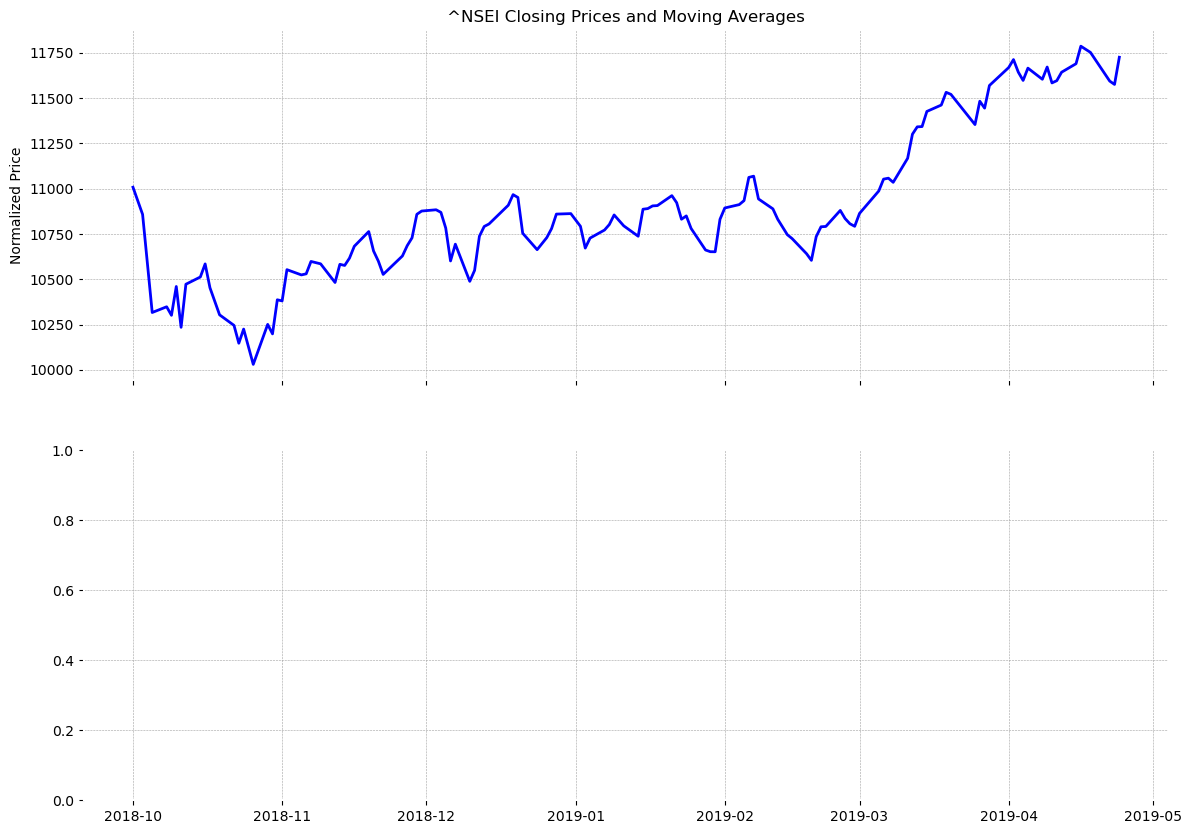

In [52]:
# Plot closing price and moving average
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot Closing Prices, High, Low, and 20-Day Moving Average
ax1.plot(stock_data['Close'], label='Close Price', color='blue')
# ax1.plot(stock_data['20_MA'], label='20-Day MA', color='orange')
ax1.set_title(f'{ticker_symbol} Closing Prices and Moving Averages')
ax1.set_ylabel('Normalized Price')


# ax1.plot(stock_data['10_MA'], label='10-Day MA', color='red')
# 
# ax1.plot(stock_data['30_MA'], label='30-Day MA', color='green')
# ax1.legend()
# ax1.grid()

# Plotting RSI
# ax2.plot(stock_data['RSI'], label='RSI', color='green')
# ax2.axhline(30, linestyle='--', alpha=0.5, color='red')
# ax2.axhline(70, linestyle='--', alpha=0.5, color='red')
# ax2.set_title(f'{ticker_symbol} Relative Strength Index (RSI)')
# ax2.set_xlabel('Date')
# # ax2.set_ylabel('RSI')
# ax2.legend()
# ax2.grid()

# plt.tight_layout()
# plt.show()

In [136]:
pip install mplfinance


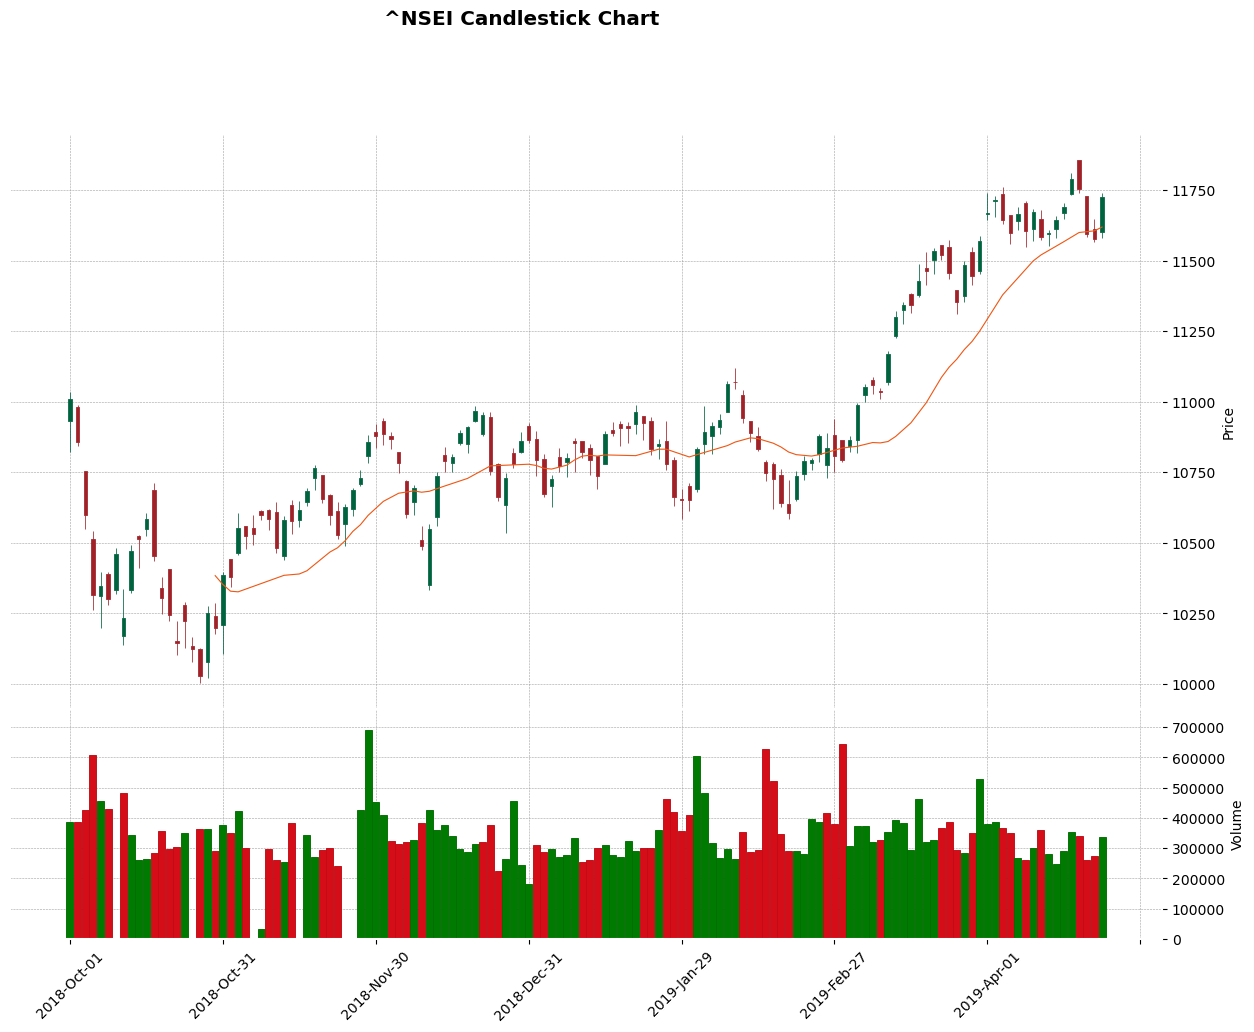

In [53]:
import mplfinance as mpf

mpf.plot(stock_data, type='candle', style='charles', title=f'{ticker_symbol} Candlestick Chart',
         ylabel='Price', volume=True, mav=(20), figscale=2)

In [8]:
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

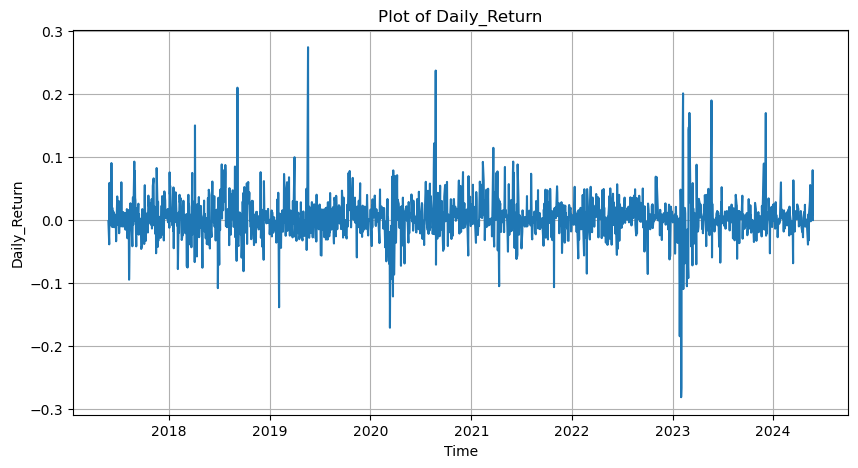

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(stock_data['Daily_Return'])
plt.title(f"Plot of {'Daily_Return'}")
plt.xlabel('Time')
plt.ylabel('Daily_Return')
plt.grid(True)
plt.show()

In [10]:
data = stock_data.filter(['Close']).values

In [11]:
data

array([[  63.34476852],
       [  63.1812973 ],
       [  60.70199585],
       ...,
       [3140.94995117],
       [3387.30004883],
       [3384.94995117]])

In [12]:
#normalizing the data as it make sthe computation faster
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data =  scaler.fit_transform(data)

In [13]:
normalized_data.shape

(1728, 1)

In [14]:
training_data_len = int(np.ceil( len(normalized_data) * .85 ))
training_data_len

1469

In [15]:
train_data=normalized_data[0:int(training_data_len)]

In [238]:
# train_data = normalized_data[0:int(training_data_len), :]

In [16]:
train_data.size

1469

In [17]:
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.00132001, 0.00128021, 0.00067659, 0.0015389 , 0.00139297,
       0.00138634, 0.00148584, 0.00148584, 0.00288544, 0.0033166 ,
       0.00311761, 0.00344263, 0.00324364, 0.00346253, 0.00330997,
       0.0034758 , 0.00326353, 0.00340283, 0.00326353, 0.00338957,
       0.0032569 , 0.00265991, 0.0032768 , 0.00372786, 0.0035753 ,
       0.00348906, 0.00400646, 0.0036151 , 0.00384062, 0.00383399,
       0.00370133, 0.00378756, 0.00359519, 0.00464324, 0.00457691,
       0.00439118, 0.00439118, 0.00418555, 0.00440445, 0.00452384,
       0.00462998, 0.00450394, 0.00437791, 0.00457028, 0.00427178,
       0.00429831, 0.00419218, 0.00449731, 0.00472947, 0.00417228,
       0.00420545, 0.00448404, 0.00411922, 0.00238132, 0.00126694,
       0.00098171, 0.00137307, 0.00118071, 0.00094191, 0.00078935])]
[0.00015919675845304897]

[array([0.00132001, 0.00128021, 0.00067659, 0.0015389 , 0.00139297,
       0.00138634, 0.00148584, 0.00148584, 0.00288544, 0.0033166 ,
       0.00311761, 0.00344263, 0

In [18]:
x_train.shape
# no of sample, to no of indexes , no of features 

(1409, 60, 1)

In [19]:
y_train.shape

(1409,)

In [34]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# print(tf.__version__)

In [21]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=15, epochs=50)

Epoch 1/50


C:\Users\G513_HN084WS\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0152
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0012
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 7.1853e-04
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 9.2887e-04
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 5.1654e-04
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 8.2332e-04
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.0084e-04
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 9.1866e-04
Epoch 9/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 4.5990e-04
Epoch 10/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.1535e-04
Epoch 11/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.8358e-04
Epoch 12/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.4165e-04
Epoch 13/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 3.4088e-04
Epoch 14/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.2249e-04
Epoch 15/50
94/94 ━━━━━━━━━━━━━━━━

In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = normalized_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = normalized_data[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"RMSE: {rmse}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
RMSE: 2589.3557406396517


C:\Users\G513_HN084WS\AppData\Local\Temp\ipykernel_29624\2760524178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


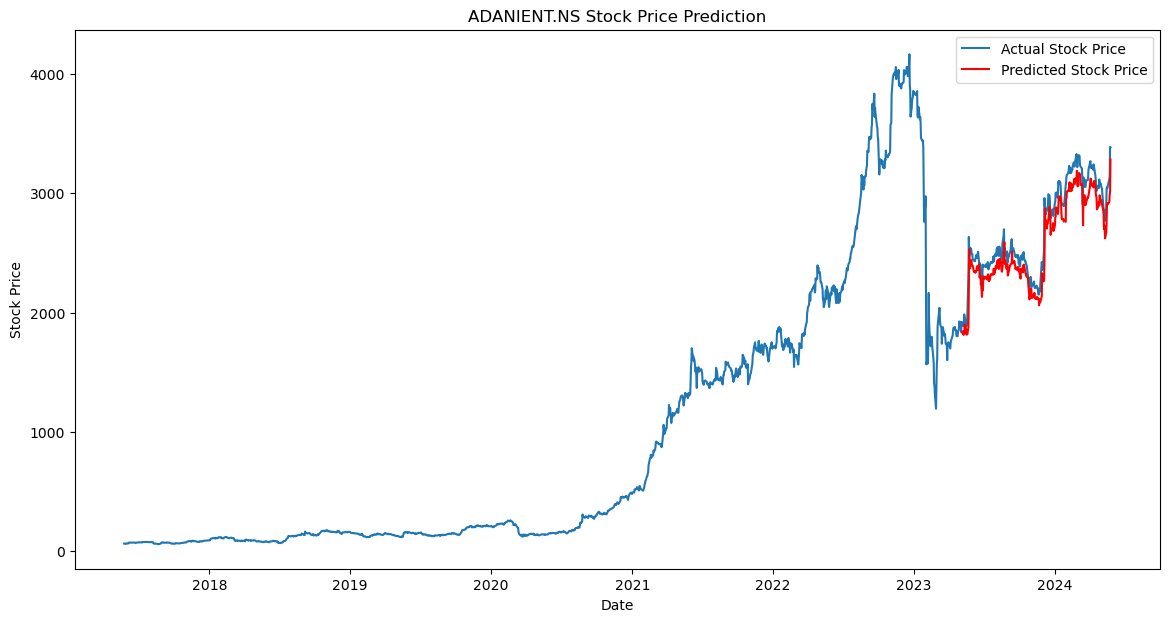

In [23]:
train_data_len = training_data_len
valid = stock_data[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Actual Stock Price')
plt.plot(valid.index, valid['Predictions'], label='Predicted Stock Price', color='red')
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\G513_HN084WS\AppData\Local\Temp\ipykernel_29624\181113684.py:19: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=stock_data.index[-1], periods=n_future_days + 1, closed='right')


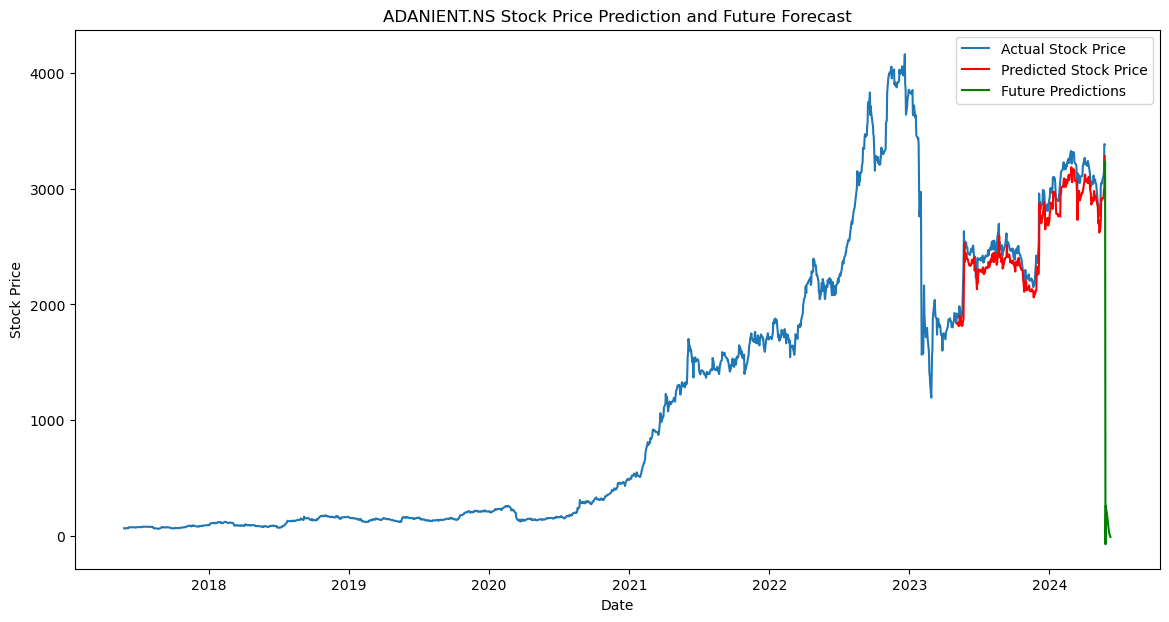

In [24]:
# can this predict future??
# yessss


last_60_days = normalized_data[-60:]
future_predictions = []
n_future_days = 15
for _ in range(n_future_days):
    last_60_days = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))
    next_pred = model.predict(last_60_days)
    future_predictions.append(next_pred[0, 0])
    next_pred_scaled = scaler.transform(next_pred)
    last_60_days = np.append(last_60_days[0, 1:], next_pred_scaled)[-60:]

# Inverse transform future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot future predictions
future_dates = pd.date_range(start=stock_data.index[-1], periods=n_future_days + 1, closed='right')
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Actual Stock Price')
plt.plot(valid.index, valid['Predictions'], label='Predicted Stock Price', color='red')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='green')
plt.title(f'{ticker_symbol} Stock Price Prediction and Future Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [26]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Fetch historical stock data
ticker_symbol = 'INFY.NS'  # Replace with your desired stock ticker symbol
start_date = '2022-01-01'
end_date = '2024-05-24'
stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Prepare the data
data = stock_data[['Close']].values

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

sequence_length = 60
x, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and test sets (80% train, 20% test)
split_ratio_train = 0.8
split_index_train = int(split_ratio_train * len(x))

x_train, x_test = x[:split_index_train], x[split_index_train:]
y_train, y_test = y[:split_index_train], y[split_index_train:]

# Reshape data to fit LSTM input shape (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=40, epochs=50)

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform y_test for accurate comparison
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"RMSE: {rmse}")


[*********************100%***********************]  1 of 1 completed
Epoch 1/50


C:\Users\G513_HN084WS\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0486
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0099
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0063
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0051
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0045
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0041
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0042
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0043
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0036
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0033
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0036
Epoch 13/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0035
Epoch 14/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0034
Epoch 15/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0035
Epoch 16/50
11/

C:\Users\G513_HN084WS\AppData\Local\Temp\ipykernel_29624\2089861685.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


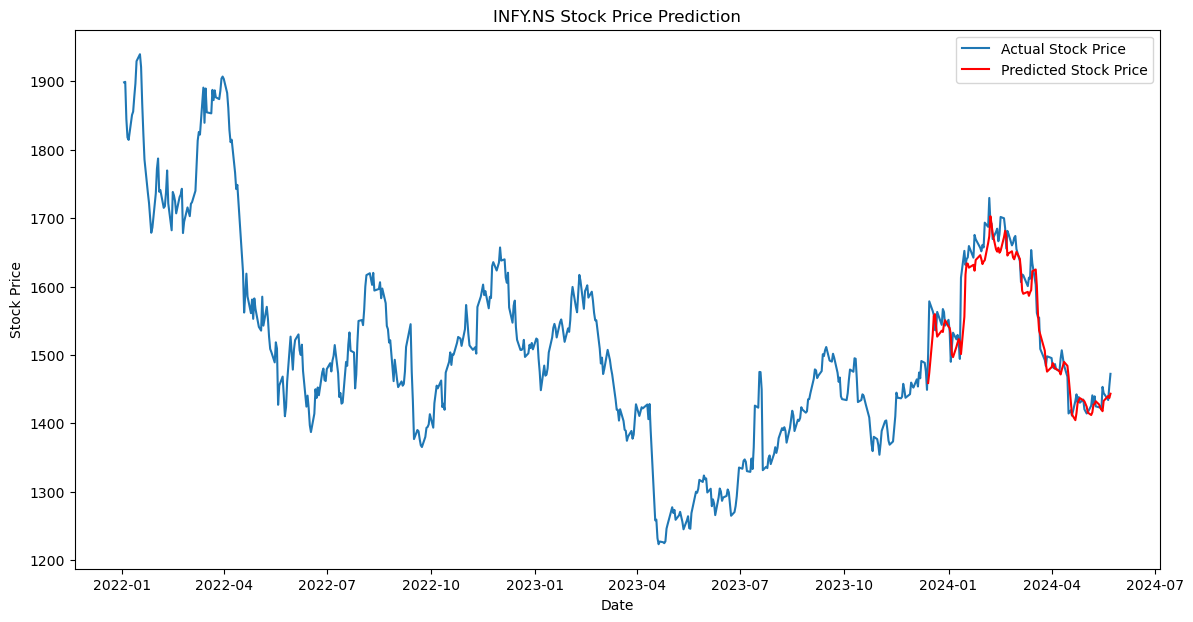

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\G513_HN084WS\AppData\Local\Temp\ipykernel_29624\2089861685.py:32: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=stock_data.index[-1], periods=n_future_days + 1, closed='right')


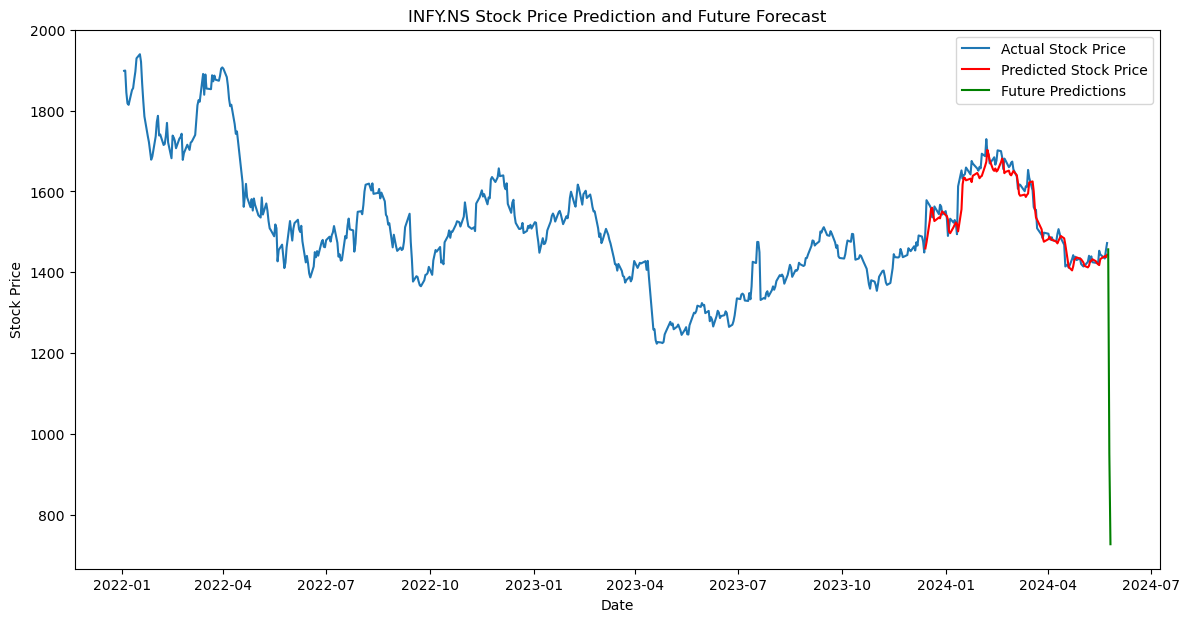

In [27]:
#chatgpt's model
# Create the validation set from the appropriate section of the stock_data
train_data_len = split_index_train + sequence_length
valid = stock_data.iloc[train_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Actual Stock Price')
plt.plot(valid.index, valid['Predictions'], label='Predicted Stock Price', color='red')
plt.title(f'{ticker_symbol} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Predict future values
last_60_days = scaled_data[-60:]
future_predictions = []
n_future_days = 3  # Number of days to predict into the future

for _ in range(n_future_days):
    last_60_days_reshaped = np.reshape(last_60_days, (1, last_60_days.shape[0], 1))
    next_pred = model.predict(last_60_days_reshaped)
    future_predictions.append(next_pred[0, 0])
    next_pred_scaled = scaler.transform(next_pred)
    last_60_days = np.append(last_60_days[1:], next_pred_scaled)

# Inverse transform future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot future predictions
future_dates = pd.date_range(start=stock_data.index[-1], periods=n_future_days + 1, closed='right')
plt.figure(figsize=(14, 7))
plt.plot(stock_data['Close'], label='Actual Stock Price')
plt.plot(valid.index, valid['Predictions'], label='Predicted Stock Price', color='red')
plt.plot(future_dates, future_predictions, label='Future Predictions', color='green')
plt.title(f'{ticker_symbol} Stock Price Prediction and Future Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
